# Building Python Deep Learning Project on Handwritten Digit Recognition

## 1. Import the libraries and load the dataset

In [1]:
import keras
!pip install keras-tuner
!pip.install -u keras-tuner

Defaulting to user installation because normal site-packages is not writeable


'pip.install' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from tensorflow import keras
import tensorflow as tf

In [3]:
print(tf.__version__)

2.10.0


## 2. Load Data from The MNIST dataset
-  This is probably one of the most popular datasets among machine learning and deep learning enthusiasts.
-  The MNIST dataset contains 60,000 training images of handwritten digits from zero to nine and 10,000 images for testing.
-  So, the MNIST dataset has 10 different classes. The handwritten digits images are represented as a 28×28 matrix where each cell contains grayscale pixel value.

In [4]:
from keras.datasets import mnist
from keras.models import Sequential

In [5]:
#The mnist.load_data() method returns us the training data, its labels and also the testing data and its labels
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [7]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

2


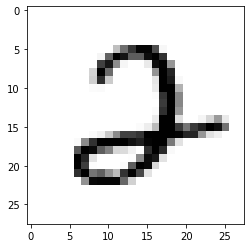

In [8]:

plt.imshow(x_train[16], cmap='Greys')
print(y_train[16])

In [9]:
x_train[0].shape

(28, 28)

In [10]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

## 3. Show Image from Numbers

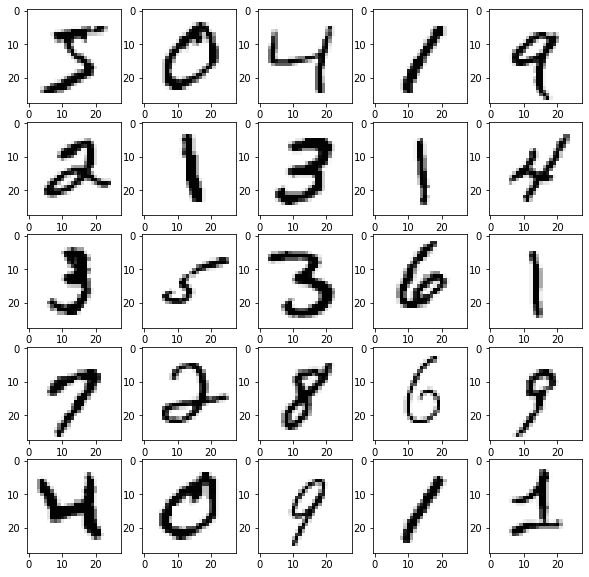

In [11]:
plt.figure(figsize=(10,10))
 
j=1
for i in range(25):
    
    plt.subplot(5,5,j); j+=1
    plt.imshow(x_train[i], cmap="Greys")
    #ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
  #plt.axis('off') # off the axis
  #plt.title('{} / {}'.format(class_labels[y_train[i]], y_train[i]))
   # plt.title()

## 4. Preprocess the data and Change Dimension / Feature Scaling

In [12]:
x_train.ndim

3

In [13]:
x_train[0].shape

(28, 28)

## 5. Preprocess the data Scaling Images

- The image data cannot be fed directly into the model so we need to perform some operations and process the data to make it       ready for our neural network.
- The dimension of the training data is (60000,28,28). The CNN model will require one more dimension so we reshape the matrix to   shape (60000,28,28,1).

In [14]:
## Feature Scaling
x_train=x_train.astype('float32')/225
x_test=x_test.astype('float32')/225

In [15]:
x_train=x_train.reshape(len(x_train),28,28,1)
x_test=x_test.reshape(len(x_test),28,28,1)

In [16]:
x_train

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

## 6. Import the libraries.

In [17]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

## 7. Hypertuning the Model
- Now the main step comes, here we have to create a function that is used to hyper-tune the model with several layers and         parameters. First, we have to create a function:

In [18]:
def build_model(hp):  
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(28,28,1)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(10, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model


- Here we create a function called buiild_model() in that we have created the Sequential object, in the Sequential.
- We create our first convolutional layer with the help of the Conv2D module that is present inside the Keras library.
- In the Conv2D where we using certain parameters:
    - Filters: Creating a range of integers that takes a certain values
    - kernel_size: An integer or tuple/list of 2 integers, specifying the height and width of the 2D convolution window.
    - activation: Activation function to use.
    - input_shape: It contains a shape of the image with the axis.
- So, here we create the 2 convolutional layers by applying certain sizes of filters, then we create a Flatten layer.
- The Flatten layer flatten the input, Example: if the input is (batch_size,4,4)  then output is (batch_size,8). Then we create an output layer using Dense and compile it with certain parameters.

In [19]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

C:\Users\AJAY KUMAR.DESKTOP-HKGPGTM\AppData\Local\Temp\ipykernel_3440\556418634.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import RandomSearch


## 8. Optimize Model
- Now we will use the Keras module RandomSearch for the optimization of hyperparameter and search the best parameters using the   search() method.

In [20]:
#creating randomsearch object
tuner = RandomSearch(build_model,
                    objective='val_accuracy',
                    max_trials = 5)

INFO:tensorflow:Reloading Oracle from existing project .\untitled_project\oracle.json
INFO:tensorflow:Reloading Tuner from .\untitled_project\tuner0.json


In [21]:
# search best parameter
tuner.search(x_train,y_train,epochs=3,validation_data=(x_train,y_train))

INFO:tensorflow:Oracle triggered exit


- Resultant of the above code concludes that RandomSearch takes 5 trials and finds the best parameters from the ranges, after     finding the best parameter we apply on over the model and get the best model.

In [22]:
model=tuner.get_best_models(num_models=1)[0]
 
#summary of best model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 112)       1120      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 48)        134448    
                                                                 
 flatten (Flatten)           (None, 23232)             0         
                                                                 
 dense (Dense)               (None, 64)                1486912   
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 1,623,130
Trainable params: 1,623,130
Non-trainable params: 0
_________________________________________________________________


## 9. Fitting Data
- Now we fit our testing data with the no of values that we have obtained from the hyper tuning of the model.

In [23]:
history =model.fit(x_train, y_train, epochs=10, validation_split=0.2, initial_epoch=3)

Epoch 4/10
1500/1500 [==============================] - 325s 215ms/step - loss: 0.0149 - accuracy: 0.9954 - val_loss: 0.0184 - val_accuracy: 0.9939
Epoch 5/10
1500/1500 [==============================] - 323s 215ms/step - loss: 0.0097 - accuracy: 0.9966 - val_loss: 0.0200 - val_accuracy: 0.9938
Epoch 6/10
1500/1500 [==============================] - 318s 212ms/step - loss: 0.0091 - accuracy: 0.9969 - val_loss: 0.0203 - val_accuracy: 0.9942
Epoch 7/10
1500/1500 [==============================] - 315s 210ms/step - loss: 0.0059 - accuracy: 0.9982 - val_loss: 0.0304 - val_accuracy: 0.9923
Epoch 8/10
1500/1500 [==============================] - 329s 219ms/step - loss: 0.0078 - accuracy: 0.9974 - val_loss: 0.0287 - val_accuracy: 0.9935
Epoch 9/10
1500/1500 [==============================] - 322s 215ms/step - loss: 0.0050 - accuracy: 0.9982 - val_loss: 0.0325 - val_accuracy: 0.9926
Epoch 10/10
1500/1500 [==============================] - 317s 211ms/step - loss: 0.0050 - accuracy: 0.9987 - val

In [24]:
y_pred=model.predict(x_test)

313/313 [==============================] - 16s 51ms/step


In [26]:
y_pred=y_pred.argmax(axis=0)

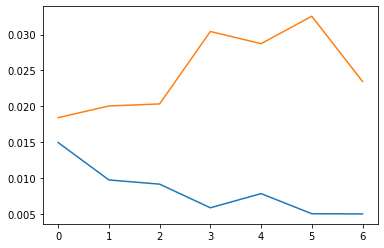

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

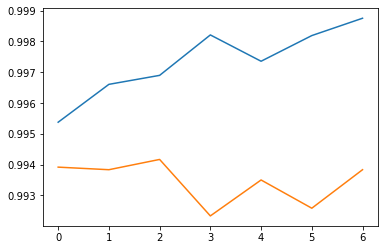

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

# 10.Test & Evaluate Model

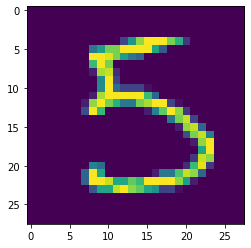

In [29]:
plt.imshow(x_test[15])

In [30]:
x_test[15].shape

(28, 28, 1)

In [31]:
np.argmax(model.predict(np.expand_dims(x_test[15],axis=0)))

1/1 [==============================] - 0s 192ms/step


5

In [32]:
import cv2
t_img=cv2.imread('download (1).png')

## 11. Split datasets

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation=train_test_split(x_train,y_train,test_size=0.2,random_state=200)

In [34]:
X_train.shape,  y_train.shape, X_validation.shape, y_validation.shape

((48000, 28, 28, 1), (48000,), (12000, 28, 28, 1), (12000,))

In [35]:
model=Sequential()

model.add(Conv2D(filters=32, kernel_size=(2,2),padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=(2,2), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2)),
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25)),
model.add(Dense(10, activation='softmax'))


In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 32)          0         
                                                                 
 flatten_1 (Flatten)         (None, 1568)             

## 12 .Campile 

In [37]:
model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

## 13.  Train the model

In [38]:
history=model.fit(X_train, y_train, epochs=10, batch_size=500, verbose=1, validation_data=(X_validation, y_validation))

Epoch 1/10
96/96 [==============================] - 24s 239ms/step - loss: 0.7251 - accuracy: 0.7748 - val_loss: 0.2069 - val_accuracy: 0.9389
Epoch 2/10
96/96 [==============================] - 24s 245ms/step - loss: 0.2337 - accuracy: 0.9279 - val_loss: 0.1283 - val_accuracy: 0.9621
Epoch 3/10
96/96 [==============================] - 24s 246ms/step - loss: 0.1704 - accuracy: 0.9471 - val_loss: 0.0961 - val_accuracy: 0.9695
Epoch 4/10
96/96 [==============================] - 22s 229ms/step - loss: 0.1418 - accuracy: 0.9556 - val_loss: 0.0794 - val_accuracy: 0.9755
Epoch 5/10
96/96 [==============================] - 23s 237ms/step - loss: 0.1216 - accuracy: 0.9613 - val_loss: 0.0720 - val_accuracy: 0.9772
Epoch 6/10
96/96 [==============================] - 23s 235ms/step - loss: 0.1083 - accuracy: 0.9668 - val_loss: 0.0622 - val_accuracy: 0.9799
Epoch 7/10
96/96 [==============================] - 22s 227ms/step - loss: 0.0963 - accuracy: 0.9701 - val_loss: 0.0580 - val_accuracy: 0.9811

## 15. Test and Evaluate Model

In [39]:
model.predict(x_test)

313/313 [==============================] - 2s 6ms/step


array([[6.5175826e-08, 3.6275793e-07, 2.1233377e-06, ..., 9.9995577e-01,
        5.0834359e-08, 3.5393117e-05],
       [7.6496667e-07, 4.5530297e-04, 9.9954295e-01, ..., 4.0357921e-09,
        9.1295973e-08, 5.5826788e-10],
       [1.0792955e-06, 9.9985933e-01, 1.5461204e-05, ..., 7.4801414e-05,
        1.8271593e-06, 2.9243415e-07],
       ...,
       [2.8343830e-09, 6.0489452e-07, 1.2500536e-09, ..., 7.5282742e-06,
        4.7821513e-06, 9.2943164e-06],
       [4.1798387e-07, 3.3954684e-08, 1.0267797e-08, ..., 2.2480752e-07,
        1.0042234e-03, 4.3790965e-07],
       [1.5627347e-05, 9.5776302e-09, 2.0699604e-06, ..., 2.7021374e-10,
        2.0428965e-06, 1.8456463e-07]], dtype=float32)

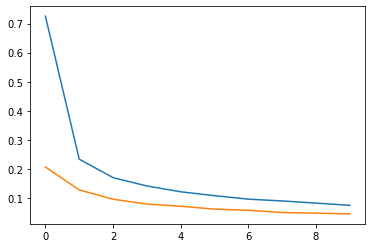

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

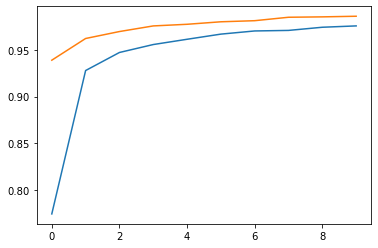

In [41]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [42]:
y_pred=model.predict(x_test)

313/313 [==============================] - 2s 6ms/step


## 15. Test the Model

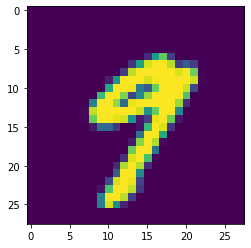

In [43]:
plt.imshow(x_test[20])

In [44]:
#model.predict(np.expand_din (x_test[0])
np.argmax(model.predict(np.expand_dims(x_test[20],axis=0)))

1/1 [==============================] - 0s 43ms/step


9

In [45]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 3s 7ms/step - loss: 0.0393 - accuracy: 0.9872


[0.03929881006479263, 0.9872000217437744]

In [46]:
y_pred

array([[6.5175826e-08, 3.6275793e-07, 2.1233377e-06, ..., 9.9995577e-01,
        5.0834359e-08, 3.5393117e-05],
       [7.6496667e-07, 4.5530297e-04, 9.9954295e-01, ..., 4.0357921e-09,
        9.1295973e-08, 5.5826788e-10],
       [1.0792955e-06, 9.9985933e-01, 1.5461204e-05, ..., 7.4801414e-05,
        1.8271593e-06, 2.9243415e-07],
       ...,
       [2.8343830e-09, 6.0489452e-07, 1.2500536e-09, ..., 7.5282742e-06,
        4.7821513e-06, 9.2943164e-06],
       [4.1798387e-07, 3.3954684e-08, 1.0267797e-08, ..., 2.2480752e-07,
        1.0042234e-03, 4.3790965e-07],
       [1.5627347e-05, 9.5776302e-09, 2.0699604e-06, ..., 2.7021374e-10,
        2.0428965e-06, 1.8456463e-07]], dtype=float32)

In [47]:
np.argmax(y_pred[20])

9

In [48]:
class_labels = ["0","1","2","3","4","5","6","7","8","9"]
len(class_labels)

10

## 16. Show Image from Numbers

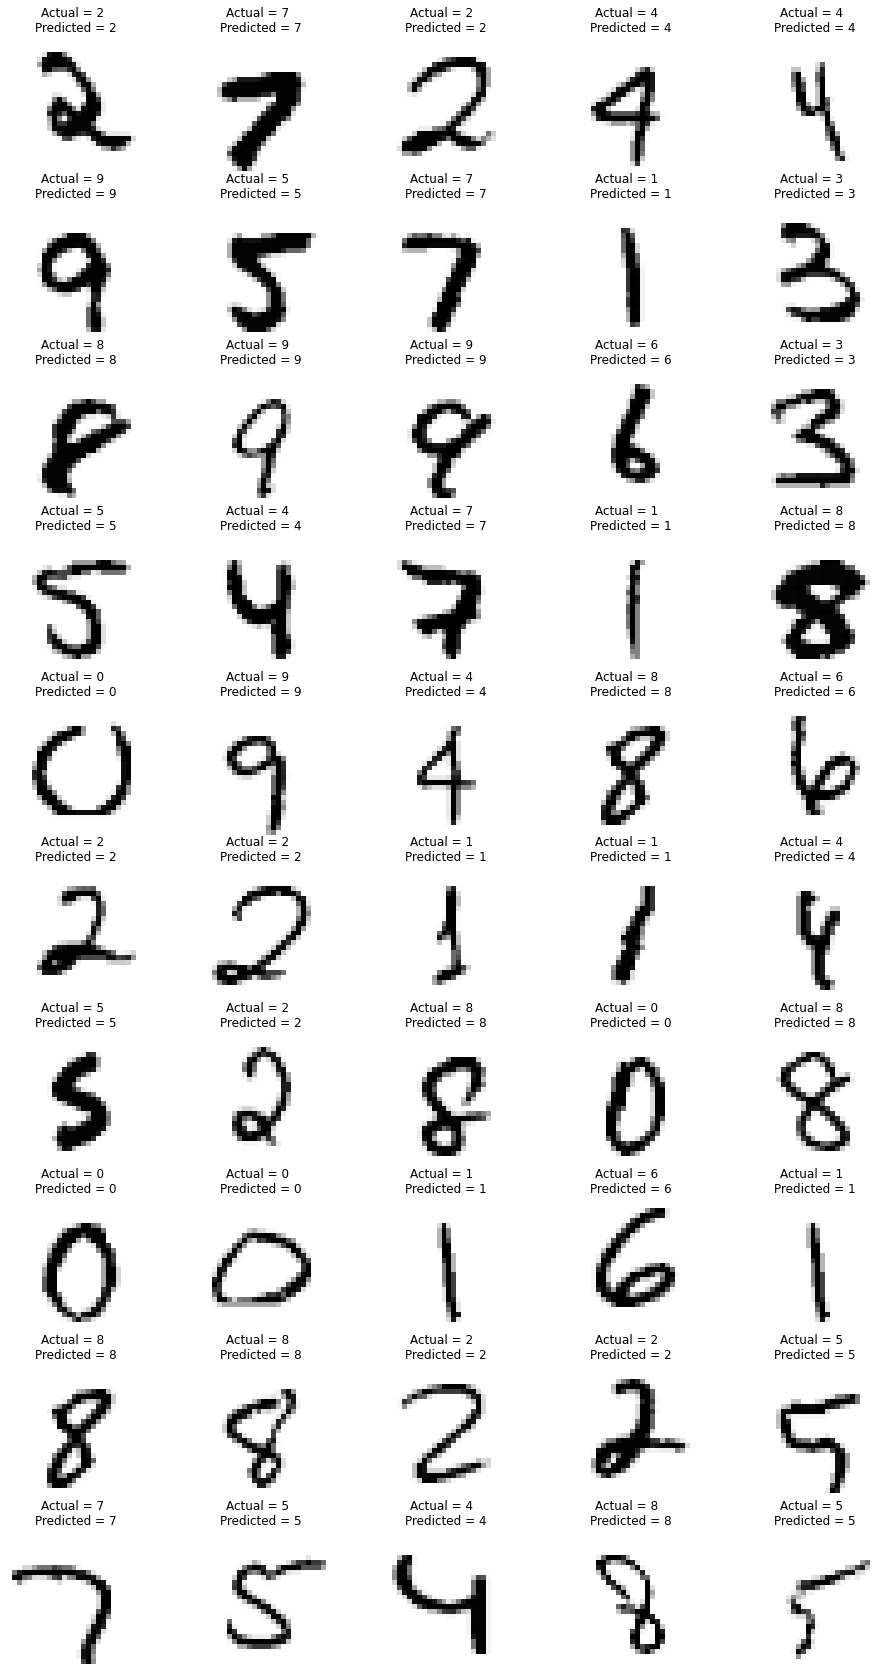

In [49]:
plt.figure(figsize=(16,30))
 
j=1
for i in np.random.randint(0, 1000,50):
  plt.subplot(10,5, j); j+=1
  plt.imshow(x_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {}  \nPredicted = {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])]))
  plt.axis('off')

## 17. Confusion Matrix

<AxesSubplot:>

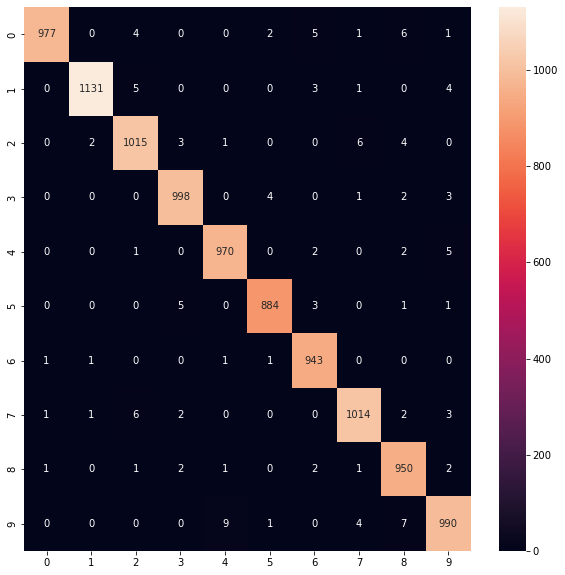

In [50]:
from sklearn.metrics import confusion_matrix,classification_report

plt.figure(figsize=(10,10))

y_pred_lables=[np.argmax(label) for label in y_pred]
cm=confusion_matrix(y_pred_lables,y_test)

sns.heatmap(cm, annot=True,fmt='d',xticklabels=class_labels,yticklabels=class_labels)

## 18.Classification Report

In [51]:
cr=classification_report(y_test,y_pred_lables,target_names=class_labels)
print(cr)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



## 19. Save Mode

In [52]:
model.save('Handwritten digit image processing.h5')

In [53]:
model_deply=keras.models.load_model('Handwritten digit image processing.h5')

## 20. Load model and Check the model

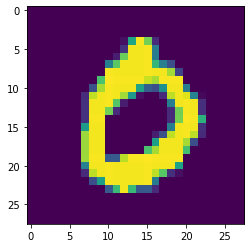

In [54]:
plt.imshow(x_test[3])

In [55]:
np.argmax(model_deply.predict(np.expand_dims(x_test[3],axis=0)))

1/1 [==============================] - 0s 105ms/step


0